# UCLA CS161, Homework 9


## Import Modules


In [1]:
# Numpy: matrix algebra library
import numpy as np

# PyTorch: deep learning library
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# matplotlib: visualization library
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_num_threads(2)

## Load Dataset

In [2]:
# Define a normalization function
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download MNIST digits dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Make test and train set data loaders
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)
# we have 10 classes 0 to 9
classes = list(range(10))

## Visualize Input Images

(-0.5, 241.5, 121.5, -0.5)

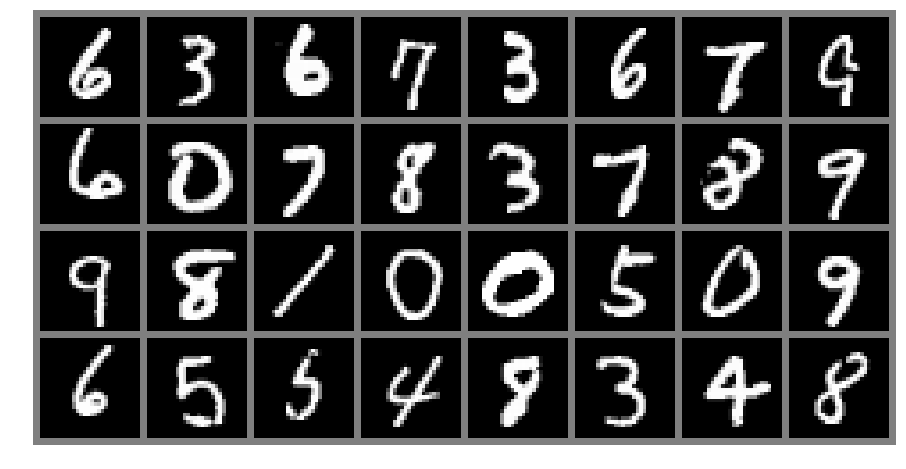

In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.figure(figsize=(16,8))
imshow(torchvision.utils.make_grid(images[:32]))
plt.axis('off')

## Network Definition



In [4]:
class FCNet(nn.Module):
    def __init__(self):
        """
        initialize the network, define the layers
        """
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        """
        define the forward path computation
        """
        x = x.view(-1, 1*28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = FCNet()

## Define the Loss Function and Optimizer

In [5]:
# define the loss function and optomizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


## Train the Network


In [6]:
# max interations to run, 10^100 is merely a very large value used to disable the functionality.
# MAX_ITERS = 10**100
MAX_ITERS = 500

def train_fcn(max_iter):
    iter_cnt = 0
    # loop over the dataset multiple times
    for epoch in range(2):  
        for i, data in enumerate(trainloader, 0):
            iter_cnt += 1
            if iter_cnt > max_iter:
                break
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            if i % 100 == 0:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, loss.item()))
                running_loss = 0.0

iter_cnt = 0
# loop over the dataset multiple times
for epoch in range(2):  
    for i, data in enumerate(trainloader, 0):
        iter_cnt += 1
        if iter_cnt > MAX_ITERS:
            break
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if i % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 2.309
[1,   101] loss: 0.498
[1,   201] loss: 0.306
[1,   301] loss: 0.231
[1,   401] loss: 0.278
Finished Training


## Prediction Examples

GroundTruth:      7     2     1     0     4     1     4
Predicted:        7     2     1     0     4     1     4


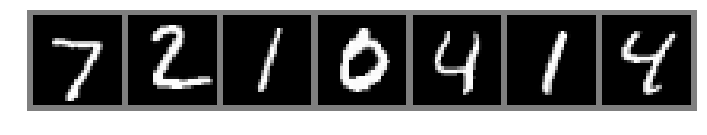

In [7]:
# get a test data batch
dataiter = iter(testloader)
images, labels = dataiter.next()

# pick the first 7 samples
images = images[:7]
labels = labels[:7]

# print images
plt.figure(figsize=(12,6))
imshow(torchvision.utils.make_grid(images))
plt.axis('off')
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(7)))

# make predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(7)))

## Measure the Test Accuracy

In [8]:
MAX_ITERS_ARR = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
TEST_ACCURACY_RESULTS = []

for max_iter in MAX_ITERS_ARR:
    train_fcn(max_iter)
    correct = 0 # counts the number of correct classifications
    total = 0 # counts the total nunber of classifications
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # calculate the average accuracy
    print('Accuracy of the network on the %d test images: %d %%' % (total,
        100 * correct / total))
    TEST_ACCURACY_RESULTS.append(100 * correct / total)

[1,     1] loss: 0.292
Accuracy of the network on the 10000 test images: 92 %
[1,     1] loss: 0.228
Accuracy of the network on the 10000 test images: 93 %
[1,     1] loss: 0.326
Accuracy of the network on the 10000 test images: 94 %
[1,     1] loss: 0.182
[1,   101] loss: 0.317
Accuracy of the network on the 10000 test images: 95 %
[1,     1] loss: 0.208
[1,   101] loss: 0.063
[1,   201] loss: 0.091
Accuracy of the network on the 10000 test images: 95 %
[1,     1] loss: 0.025
[1,   101] loss: 0.154
[1,   201] loss: 0.087
[1,   301] loss: 0.075
Accuracy of the network on the 10000 test images: 95 %
[1,     1] loss: 0.068
[1,   101] loss: 0.056
[1,   201] loss: 0.126
[1,   301] loss: 0.134
[1,   401] loss: 0.046
Accuracy of the network on the 10000 test images: 96 %
[1,     1] loss: 0.076
[1,   101] loss: 0.053
[1,   201] loss: 0.122
[1,   301] loss: 0.105
[1,   401] loss: 0.076
[1,   501] loss: 0.054
Accuracy of the network on the 10000 test images: 96 %
[1,     1] loss: 0.185
[1,   10

In [18]:
TEST_ACCURACY_RESULTS.

[97.84,
 97.5,
 97.78,
 97.64,
 97.23,
 98.09,
 97.11,
 97.4,
 96.9,
 97.94,
 97.58,
 97.86]

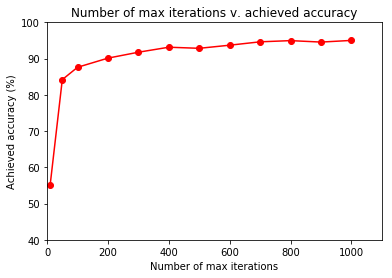

In [11]:
plt.plot(MAX_ITERS_ARR, [55.05, 84.2, 87.6, 90.13, 91.76, 93.14, 92.84, 93.7, 94.63, 94.96, 94.56, 95.02], 'ro-')
plt.axis([0, 1100, 40, 100])
plt.title('Number of max iterations v. achieved accuracy')
plt.xlabel('Number of max iterations')
plt.ylabel('Achieved accuracy (%)')
plt.show()